# Extract and Analyze Twitter Data

The tweet data is retrieved using the Twitter Developer Platform and spaCy models are used for natural language processesing. Binary classification is used to score the sentiment of the tweets; 1 designated as positive, 0 as negative and a .5 threshold. 

Use this worksheet to update the query and conduct your own research!

## Install required packages as necessary
Download the spaCy English pipeline from the terminal window: python -m spacy download en_core_web_lg

In [ ]:
%pip install os
%pip install requests
%pip install pandas
%pip install json
%pip install ast
%pip install yaml 
%pip install datetime
%pip install pandas
%pip install numpy
%pip install datetime
%pip install matplotlib 
%pip install wordcloud

%pip install re
%pip install seaborn as sns
%pip install string
%pip install warnings
%pip install spacy

In [218]:
import os
import requests
import pandas as pd
import json
import ast
import yaml 

In [219]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime, date

## Setup Bearer Token to Use Twitter API
Save your Twitter token in a plain text file, with a .yaml exension, containing only the following: 
BEARER_TOKEN: "***"

In [240]:
#AUTHENTICATION SETUP

#function to read in YAML file containing your bearer token
def process_yaml():
    with open("/Users/tdubon/twitter/config.yaml") as file:
        return yaml.safe_load(file)
     
#access bearer token
def create_bearer_token(data):
    return data["BEARER_TOKEN"] 


#connect to Twitter API
def twitter_auth_and_connect(bearer_token, url):
    headers = {"Authorization": "Bearer{}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers)
    return response.json()

## Retrieve data from Twitter
Enter keywords for query in the create_url() function. See https://tinyurl.com/2j5phrhu for instructions on customizing your query syntax

In [241]:
def create_url():
    query='Putin OR Lukashenka OR Russia OR "Vladimir Putin" -is:retweet lang:en'
    query2='Zelensky OR Ukraine OR Kyiv OR Kharkiv OR Chernihiv OR Mykolaiv OR Mariupol OR "Volodymyr Zelenskyy" -is:retweet lang:en'
    tweet_fields = "tweet.fields=created_at,public_metrics,context_annotations,text,possibly_sensitive,geo"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields)
    return url

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

Update path below to save to your own desktop

In [242]:


def main():
    url= create_url()
    data = process_yaml()
    bearer_token = create_bearer_token(data)
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))
    with open("/Users/tdubon/twitter/downloaded_tweets.json", "w") as json_file:
        json.dump(json_response, json_file)

In [243]:
if __name__ == "__main__":
    main()

main()

200
{
    "data": [
        {
            "context_annotations": [
                {
                    "domain": {
                        "description": "Top level entities that describe a Brands industry",
                        "id": "45",
                        "name": "Brand Vertical"
                    },
                    "entity": {
                        "id": "781974597310615553",
                        "name": "Entertainment"
                    }
                },
                {
                    "domain": {
                        "description": "Categories within Brand Verticals that narrow down the scope of Brands",
                        "id": "46",
                        "name": "Brand Category"
                    },
                    "entity": {
                        "id": "781974596157181956",
                        "name": "Online Site"
                    }
                },
                {
                    "domain": {
                 

200
{
    "data": [
        {
            "context_annotations": [
                {
                    "domain": {
                        "description": "Top level entities that describe a Brands industry",
                        "id": "45",
                        "name": "Brand Vertical"
                    },
                    "entity": {
                        "id": "781974597310615553",
                        "name": "Entertainment"
                    }
                },
                {
                    "domain": {
                        "description": "Categories within Brand Verticals that narrow down the scope of Brands",
                        "id": "46",
                        "name": "Brand Category"
                    },
                    "entity": {
                        "id": "781974596157181956",
                        "name": "Online Site"
                    }
                },
                {
                    "domain": {
                 

## Extract Data from JSON File

In [244]:
#read the JSON file back in

with open("/Users/tdubon/twitter/downloaded_tweets.json", "r") as f:
    read_content = json.load(f)

Inspect json data

In [245]:
read_content["data"]

[{'possibly_sensitive': False,
  'text': 'RT @mccaffreyr3: MSNBC. 11 April 2022. Russia will be incapable of running truly joint ops. Brutal and screwed up military forces. https://…',
  'context_annotations': [{'domain': {'id': '45',
     'name': 'Brand Vertical',
     'description': 'Top level entities that describe a Brands industry'},
    'entity': {'id': '781974597310615553', 'name': 'Entertainment'}},
   {'domain': {'id': '46',
     'name': 'Brand Category',
     'description': 'Categories within Brand Verticals that narrow down the scope of Brands'},
    'entity': {'id': '781974596157181956', 'name': 'Online Site'}},
   {'domain': {'id': '46',
     'name': 'Brand Category',
     'description': 'Categories within Brand Verticals that narrow down the scope of Brands'},
    'entity': {'id': '781974597105094656', 'name': 'TV/Movies Related'}},
   {'domain': {'id': '47',
     'name': 'Brand',
     'description': 'Brands and Companies'},
    'entity': {'id': '1137022824931921920', 'na

In [246]:
len(read_content["data"])

10

Define functions to retrieve each tweet field of interest

In [247]:
id_data = []

for data in read_content["data"]:
    id_record = data["id"]
    id_data.append(id_record)

In [248]:
id_data

['1513675354745061380',
 '1513675354258526211',
 '1513675354203860993',
 '1513675353574813698',
 '1513675353436401668',
 '1513675352761159686',
 '1513675352731791367',
 '1513675352639377408',
 '1513675352631087110',
 '1513675352505266177']

In [249]:
date_data = []

In [250]:
def get_created_at():
    for data in read_content["data"]:
        date_record = data["created_at"]
        date_data.append(date_record)

In [251]:
get_created_at()


In [252]:
print(date_data)

['2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z', '2022-04-12T00:28:21.000Z']


In [264]:
#Initialize Lists
id_data = []
date_data = [] 
rtwt_data = []
reply_data = []
text_data = []

#lang_data = []

In [265]:
def get_id():
    for data in read_content["data"]:
        id_record = data["id"]
        id_data.append(id_record)

def get_created_at():
    for data in read_content["data"]:
        date_record = data["created_at"]
        date_data.append(date_record)
   

def retweet_count():
    for retweets in read_content["data"]:
        rtwt_count=retweets["public_metrics"]["retweet_count"] 
        rtwt_data.append(rtwt_count)

def reply_count():
    for reply in read_content["data"]:
        reply_count = reply["public_metrics"]["reply_count"]
        reply_data.append(reply_count)

        
def get_text():
    for data in read_content["data"]:
        text_record = data["text"]
        text_data.append(text_record)
                
def get_domain():
    d_id = []
    d_name = []
    d_desc = []
    d_twt_id = []
    
    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    d_id.append(d["domain"]["id"])
                    d_name.append(d["domain"]["name"])
                    d_desc.append(d["domain"]["description"])
                    d_twt_id.append(j["id"])
                    
    domain = {"id": d_id, "name": d_name, "desc": d_desc,"tweet id": d_twt_id}
    return domain


def get_entity():    
    e_id = []
    e_name = []
    e_desc = []
    e_twt_id = []

    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    e_id.append(d["entity"]["id"])
                    e_name.append(d["entity"]["name"])
                    e_twt_id.append(j["id"])
                
    entity = {"id": e_id, "name": e_name, "desc": e_desc,"tweet id": e_twt_id}
    return entity


#def get_lang():
#    data_access = read_content["data"]
#    for data in data_access:
#        lang = data["lang"]
#        lang_data.append(lang)


In [266]:
def main():
    get_id() 
    get_created_at() 
    retweet_count()
    reply_count() 
    get_text()
    get_domain()
    get_entity()

if __name__ == "__main__":
    main()

main()


In [267]:
print(get_entity())

{'id': ['781974597310615553', '781974596157181956', '781974597105094656', '1137022824931921920', '848920371311001600', '864931126132985856', '864931126132985856', '781974597310615553', '781974596157181956', '781974597105094656', '10040667043', '10040395078', '864931126132985856', '10040395078', '864931126132985856', '864931126132985856', '864931126132985856', '1070710943665901568', '1070710943665901568', '1016738021939351558'], 'name': ['Entertainment', 'Online Site', 'TV/Movies Related', 'MSNBC', 'Technology', 'Vladimir Putin', 'Vladimir Putin', 'Entertainment', 'Online Site', 'TV/Movies Related', 'CNN', 'Joe Biden', 'Vladimir Putin', 'Joe Biden', 'Vladimir Putin', 'Vladimir Putin', 'Vladimir Putin', 'Eliot Higgins', 'Eliot Higgins', 'North Atlantic Treaty Organization'], 'desc': [], 'tweet id': ['1513675354745061380', '1513675354745061380', '1513675354745061380', '1513675354745061380', '1513675354203860993', '1513675353574813698', '1513675353574813698', '1513675353574813698', '151367

In [268]:
print(get_domain())

{'id': ['45', '46', '46', '47', '30', '10', '35', '45', '46', '46', '47', '10', '10', '35', '35', '10', '35', '10', '94', '88'], 'name': ['Brand Vertical', 'Brand Category', 'Brand Category', 'Brand', 'Entities [Entity Service]', 'Person', 'Politician', 'Brand Vertical', 'Brand Category', 'Brand Category', 'Brand', 'Person', 'Person', 'Politician', 'Politician', 'Person', 'Politician', 'Person', 'Journalist', 'Political Body'], 'desc': ['Top level entities that describe a Brands industry', 'Categories within Brand Verticals that narrow down the scope of Brands', 'Categories within Brand Verticals that narrow down the scope of Brands', 'Brands and Companies', 'Entity Service top level domain, every item that is in Entity Service should be in this domain', 'Named people in the world like Nelson Mandela', 'Politicians in the world, like Joe Biden', 'Top level entities that describe a Brands industry', 'Categories within Brand Verticals that narrow down the scope of Brands', 'Categories wi

In [269]:
print(len(id_data), len(date_data), len(rtwt_data), len(reply_data), len(text_data))

10 10 10 10 10


In [270]:
#save tweet fields to dataframe (does not include entity or domain data)
save_data = {"id": id_data, "date": date_data, "retweet count": rtwt_data, "reply count": reply_data, "text": text_data}
df = pd.DataFrame(save_data)
df.columns
df.head()
df.to_csv("/Users/tdubon/twitter/pol_tweet_data.csv")

In [271]:
len(df)

10

In [272]:
print(df)

                    id                      date  retweet count  reply count  \
0  1513675354745061380  2022-04-12T00:28:21.000Z             34            0   
1  1513675354258526211  2022-04-12T00:28:21.000Z          13348            0   
2  1513675354203860993  2022-04-12T00:28:21.000Z             59            0   
3  1513675353574813698  2022-04-12T00:28:21.000Z           3531            0   
4  1513675353436401668  2022-04-12T00:28:21.000Z           1405            0   
5  1513675352761159686  2022-04-12T00:28:21.000Z            110            0   
6  1513675352731791367  2022-04-12T00:28:21.000Z              6            0   
7  1513675352639377408  2022-04-12T00:28:21.000Z          13348            0   
8  1513675352631087110  2022-04-12T00:28:21.000Z              0            0   
9  1513675352505266177  2022-04-12T00:28:21.000Z              0            0   

                                                text  
0  RT @mccaffreyr3: MSNBC. 11 April 2022. Russia ...  
1  RT @Ky

## Date Formatting

In [273]:
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
df['date_frmt'] = [datetime.strptime(i, format_data) for i in df['date']]

In [274]:
df = df.drop(columns="date")

In [275]:
df.head()

,id,retweet count,reply count,text,date_frmt
0,1513675354745061380,34,0,RT @mccaffreyr3: MSNBC. 11 April 2022. Russia ...,2022-04-12 00:28:21
1,1513675354258526211,13348,0,RT @KyivIndependent: ⚡️⚡️Azov regiment: Russia...,2022-04-12 00:28:21
2,1513675354203860993,59,0,RT @chrizap: Ukrainian embassy in Turkey says ...,2022-04-12 00:28:21
3,1513675353574813698,3531,0,RT @Billbrowder: CNN just released this two ho...,2022-04-12 00:28:21
4,1513675353436401668,1405,0,RT @NickAdamsinUSA: It's not the Putin Price H...,2022-04-12 00:28:21


## Text Cleaning and Formatting

In [276]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import seaborn as sns
import string
import warnings
import spacy

In [277]:
#removing 
def cleanup_text(file, rem_item):
    r = re.findall(rem_item, file)
    for i in r:
        file = re.sub(i, "", file)
    return file

In [278]:
#remove handles
df["clean text"] = np.vectorize(cleanup_text)(df["text"], "@[\w]*")
df["clean text"].head()

0    RT : MSNBC. 11 April 2022. Russia will be inca...
1    RT : ⚡️⚡️Azov regiment: Russia used poisonous ...
2    RT : Ukrainian embassy in Turkey says Russia h...
3    RT : CNN just released this two hours ago: Vla...
4    RT : It's not the Putin Price Hike, it's the B...
Name: clean text, dtype: object

In [279]:
len(df["clean text"])
print(df["clean text"])

0    RT : MSNBC. 11 April 2022. Russia will be inca...
1    RT : ⚡️⚡️Azov regiment: Russia used poisonous ...
2    RT : Ukrainian embassy in Turkey says Russia h...
3    RT : CNN just released this two hours ago: Vla...
4    RT : It's not the Putin Price Hike, it's the B...
5    RT : Breaking!\nRussia uses White Phosphorus i...
6    RT : Hubris and isolation led Vladimir Putin t...
7    RT : ⚡️⚡️Azov regiment: Russia used poisonous ...
8      How come you didn't reply to any of the peop...
9     The world is seeing how weak Russia really is...
Name: clean text, dtype: object


### Tokenize text in spaCy

In [280]:
#convert to tokens
nlp = spacy.load("en_core_web_lg")
text = str(df["clean text"])
doc = nlp(text)

In [281]:
tokens_list = [] 
for token in doc:
    tokens_list.append(token)

tokens_list

[0,
    ,
 RT,
 :,
 MSNBC,
 .,
 11,
 April,
 2022,
 .,
 Russia,
 will,
 be,
 inca,
 ...,
 ,
 1,
    ,
 RT,
 :,
 ⚡,
 ️,
 ⚡,
 ️Azov,
 regiment,
 :,
 Russia,
 used,
 poisonous,
 ...,
 ,
 2,
    ,
 RT,
 :,
 Ukrainian,
 embassy,
 in,
 Turkey,
 says,
 Russia,
 h,
 ...,
 ,
 3,
    ,
 RT,
 :,
 CNN,
 just,
 released,
 this,
 two,
 hours,
 ago,
 :,
 Vla,
 ...,
 ,
 4,
    ,
 RT,
 :,
 It,
 's,
 not,
 the,
 Putin,
 Price,
 Hike,
 ,,
 it,
 's,
 the,
 B,
 ...,
 ,
 5,
    ,
 RT,
 :,
 Breaking!\nRussia,
 uses,
 White,
 Phosphorus,
 i,
 ...,
 ,
 6,
    ,
 RT,
 :,
 Hubris,
 and,
 isolation,
 led,
 Vladimir,
 Putin,
 t,
 ...,
 ,
 7,
    ,
 RT,
 :,
 ⚡,
 ️,
 ⚡,
 ️Azov,
 regiment,
 :,
 Russia,
 used,
 poisonous,
 ...,
 ,
 8,
      ,
 How,
 come,
 you,
 did,
 n't,
 reply,
 to,
 any,
 of,
 the,
 peop,
 ...,
 ,
 9,
     ,
 The,
 world,
 is,
 seeing,
 how,
 weak,
 Russia,
 really,
 is,
 ...,
 ,
 Name,
 :,
 clean,
 text,
 ,,
 dtype,
 :,
 object]

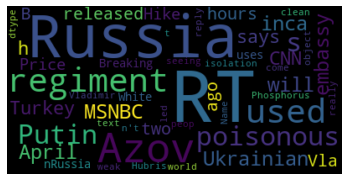

In [282]:
#wordcloud
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(str(tokens_list))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Prepare text for analysis

In [283]:
#Review entities recognized
for ent in doc.ents:
    print(ent.text, ent.label_)

0 CARDINAL
MSNBC ORG
11 April 2022 DATE
Russia GPE
1 CARDINAL
Russia GPE
2 CARDINAL
Ukrainian NORP
Turkey GPE
Russia GPE
3 CARDINAL
CNN ORG
this two hours ago TIME
4 CARDINAL
the Putin Price Hike ORG
5 CARDINAL
6 CARDINAL
Vladimir Putin PERSON
7 CARDINAL
Russia GPE
8 CARDINAL
9 CARDINAL
Russia GPE


In [284]:
#Add a category for entities of interest, if needed. 
from spacy.matcher import PhraseMatcher 
matcher = PhraseMatcher(nlp.vocab) 

#define politicians as entities 
terms = ["Putin", "Zelensky"] 
patterns = [nlp.make_doc(term) for term in terms] 
matcher.add("politiciansList", None, *patterns) 

matches = matcher(doc) 

#this prints out the spans where the instances are found and the entity identified
for mid, start, end in matches: 
    print(start, end, doc[start:end])


67 68 Putin
97 98 Putin


## Text Classification

In [285]:
import random
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

In [286]:
#set the threshold value in config

config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL }

textcat = nlp.add_pipe("textcat", config=config) 

In [287]:
train_data = [("Helping refugees. This is what kindness looks like.", {"cats": {"POS": True}}),
              ("In this time of uncertainty, we have a clear way forward: Help Ukraine defend itself. Support the Ukrainian people. Hold Russia accountable.", {"cats": {"POS": True}}),
              ("Priests demand head of Ukrainian Orthodox Church Moscow Patriarchate be brought to church tribunal for position on war.", {"cats": {"POS": True}}),
              ("Mayor of the most northern village in Ukraine Hremiach Hanna Havrylina was released after yesterday’s prisoners’ swap.", {"cats": {"POS": True}}),
              ("Look at this female volunteer from Belarus fighting alongside Ukrainians.", {"cats": {"POS": True}}),
              ("Russian soldiers: They're animals... Humans don't behave like this. My parents told me about WW2 & the fascists didn't even do such things.", {"cats": {"NEG": True}}),
              ("All Russians are evil", {"cats": {"NEG": True}}),
              ("The West is pushing Ukraine toward a conflict.", {"cats": {"NEG": True}}),
              ("Cowards", {"cats": {"NEG": True}}),
              ("Russia’s deployment of combat forces is a mere repositioning of troops on its own territory.", {"cats": {"NEG": True}}),
              ("Ukraine and Ukrainian government officials are the aggressor in the Russia-Ukraine relationship.", {"cats": {"NEG": True}})] 

In [288]:
textcat.add_label("POS")
textcat.add_label("NEG")
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 

In [289]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [290]:
#Define training example

epochs = 20

#Disable other pipe components & define training loop to incorporate statistical information

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training() #Creates optimizer object
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label) 
            print(nlp.update([example], sgd=optimizer))
            

{'textcat': 0.25}
{'textcat': 0.2551186680793762}
{'textcat': 0.24861854314804077}
{'textcat': 0.2584882080554962}
{'textcat': 0.25236111879348755}
{'textcat': 0.2556113302707672}
{'textcat': 0.256054550409317}
{'textcat': 0.2555079162120819}
{'textcat': 0.26421406865119934}
{'textcat': 0.2660631537437439}
{'textcat': 0.25007784366607666}
{'textcat': 0.23931021988391876}
{'textcat': 0.2441931664943695}
{'textcat': 0.23783953487873077}
{'textcat': 0.21273474395275116}
{'textcat': 0.20487724244594574}
{'textcat': 0.2586621940135956}
{'textcat': 0.29294994473457336}
{'textcat': 0.2302028238773346}
{'textcat': 0.20108486711978912}
{'textcat': 0.26384690403938293}
{'textcat': 0.18601612746715546}
{'textcat': 0.22053582966327667}
{'textcat': 0.20575711131095886}
{'textcat': 0.2281399369239807}
{'textcat': 0.16189910471439362}
{'textcat': 0.224391907453537}
{'textcat': 0.21396180987358093}
{'textcat': 0.2448420524597168}
{'textcat': 0.26532894372940063}
{'textcat': 0.21453113853931427}
{'text

In [291]:
#test 1
doc2 = nlp("As Russia continues to commit horrific atrocities against the Ukrainian people, we must take additional steps to cut off")

print(doc2.cats)

{'POS': 0.5280219912528992, 'NEG': 0.4719780385494232}


In [292]:
#test 2
doc3 = nlp("One of the captured Russian soldiers who was sent by Putin to “denazify” Ukraine")
print(doc3.cats)

{'POS': 0.44406747817993164, 'NEG': 0.5559325218200684}


In [293]:
#process each row in clean text column
df["nlp_proc"] = [nlp(i) for i in df["clean text"]]

In [295]:
#save positive/negative predictioins to cats column
df["cats"] = [i.cats for i in df["nlp_proc"]]

In [296]:
df

,id,retweet count,reply count,text,date_frmt,clean text,nlp_proc,cats
0,1513675354745061380,34,0,RT @mccaffreyr3: MSNBC. 11 April 2022. Russia ...,2022-04-12 00:28:21,RT : MSNBC. 11 April 2022. Russia will be inca...,"(RT, :, MSNBC, ., 11, April, 2022, ., Russia, ...","{'POS': 0.2907613217830658, 'NEG': 0.709238648..."
1,1513675354258526211,13348,0,RT @KyivIndependent: ⚡️⚡️Azov regiment: Russia...,2022-04-12 00:28:21,RT : ⚡️⚡️Azov regiment: Russia used poisonous ...,"(RT, :, ⚡, ️, ⚡, ️Azov, regiment, :, Russia, u...","{'POS': 0.26471829414367676, 'NEG': 0.73528164..."
2,1513675354203860993,59,0,RT @chrizap: Ukrainian embassy in Turkey says ...,2022-04-12 00:28:21,RT : Ukrainian embassy in Turkey says Russia h...,"(RT, :, Ukrainian, embassy, in, Turkey, says, ...","{'POS': 0.2726724147796631, 'NEG': 0.727327585..."
3,1513675353574813698,3531,0,RT @Billbrowder: CNN just released this two ho...,2022-04-12 00:28:21,RT : CNN just released this two hours ago: Vla...,"(RT, :, CNN, just, released, this, two, hours,...","{'POS': 0.31318503618240356, 'NEG': 0.68681496..."
4,1513675353436401668,1405,0,RT @NickAdamsinUSA: It's not the Putin Price H...,2022-04-12 00:28:21,"RT : It's not the Putin Price Hike, it's the B...","(RT, :, It, 's, not, the, Putin, Price, Hike, ...","{'POS': 0.5660775303840637, 'NEG': 0.433922410..."
5,1513675352761159686,110,0,RT @Xnerdz: Breaking!\nRussia uses White Phosp...,2022-04-12 00:28:21,RT : Breaking!\nRussia uses White Phosphorus i...,"(RT, :, Breaking, !, \n, Russia, uses, White, ...","{'POS': 0.25086405873298645, 'NEG': 0.74913597..."
6,1513675352731791367,6,0,RT @John_Hudson: Hubris and isolation led Vlad...,2022-04-12 00:28:21,RT : Hubris and isolation led Vladimir Putin t...,"(RT, :, Hubris, and, isolation, led, Vladimir,...","{'POS': 0.3288046419620514, 'NEG': 0.671195328..."
7,1513675352639377408,13348,0,RT @KyivIndependent: ⚡️⚡️Azov regiment: Russia...,2022-04-12 00:28:21,RT : ⚡️⚡️Azov regiment: Russia used poisonous ...,"(RT, :, ⚡, ️, ⚡, ️Azov, regiment, :, Russia, u...","{'POS': 0.26471829414367676, 'NEG': 0.73528164..."
8,1513675352631087110,0,0,@tswifty4lyfe @EliotHiggins How come you didn'...,2022-04-12 00:28:21,How come you didn't reply to any of the peop...,"( , How, come, you, did, n't, reply, to, any,...","{'POS': 0.21209175884723663, 'NEG': 0.78790825..."
9,1513675352505266177,0,0,@sophiemurmur The world is seeing how weak Rus...,2022-04-12 00:28:21,The world is seeing how weak Russia really is...,"( , The, world, is, seeing, how, weak, Russia,...","{'POS': 0.3176213502883911, 'NEG': 0.682378649..."


In [297]:
#assign value of 1 to positive classification, 0 to negative
sc_val = []

for i in df["cats"]:
    if i["POS"] >= .5:
        sc_val.append(1)
    else:
        sc_val.append(0)
        

In [299]:
#append classification score to dataframe
df["score"] = sc_val
print(df.head())

                    id  retweet count  reply count  \
0  1513675354745061380             34            0   
1  1513675354258526211          13348            0   
2  1513675354203860993             59            0   
3  1513675353574813698           3531            0   
4  1513675353436401668           1405            0   

                                                text           date_frmt  \
0  RT @mccaffreyr3: MSNBC. 11 April 2022. Russia ... 2022-04-12 00:28:21   
1  RT @KyivIndependent: ⚡️⚡️Azov regiment: Russia... 2022-04-12 00:28:21   
2  RT @chrizap: Ukrainian embassy in Turkey says ... 2022-04-12 00:28:21   
3  RT @Billbrowder: CNN just released this two ho... 2022-04-12 00:28:21   
4  RT @NickAdamsinUSA: It's not the Putin Price H... 2022-04-12 00:28:21   

                                          clean text  \
0  RT : MSNBC. 11 April 2022. Russia will be inca...   
1  RT : ⚡️⚡️Azov regiment: Russia used poisonous ...   
2  RT : Ukrainian embassy in Turkey says Russia h.

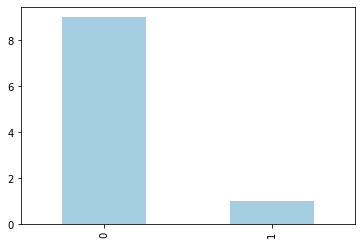

In [302]:
#plot
ax = df.score.value_counts().plot(kind="bar", colormap="Paired")
plt.show()

In [303]:
#print out tweet id, text and score = to review results
for index, i in enumerate(df["score"]):
    if i == 1:
        print(df["id"][index], df["clean text"][index], df["score"][index])

1513675353436401668 RT : It's not the Putin Price Hike, it's the Biden Price Hike! 1


In [304]:
#Saving custom model - define where you would like your model to be saved. 

from pathlib import Path
output_dir=Path("/Users/tdubon/spaCy_models")

def save_model(output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
        
save_model(output_dir)

Saved model to /Users/tdubon/spaCy_models


In [305]:
### Loading custom model
nlp = spacy.load("/Users/tdubon/spaCy_models")